In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df = pd.read_csv("./students.csv")

### 1 ###

In [40]:
df.head()

,Name,Age,Group,Score
0,Anna,19,A,85.0
1,Boris,21,B,78.0
2,Clara,20,A,92.0
3,Dmitry,22,C,67.0
4,Elena,19,B,55.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    20 non-null     object 
 1   Age     20 non-null     int64  
 2   Group   20 non-null     object 
 3   Score   19 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes


In [42]:
df.describe()

,Age,Score
count,20.000000,19.000000
mean,20.850000,75.315789
std,1.386969,13.577157
min,19.000000,45.000000
25%,20.000000,68.000000
50%,21.000000,78.000000
75%,22.000000,84.500000
max,23.000000,95.000000


In [ ]:
average_score = df["Score"].mean()
group_counts = df["Group"].value_counts()


### 2 ###

In [ ]:
high_scorers_sorted = df[df["Score"] > 80].sort_values(by="Score")

oldest_student = df.loc[df["Age"].idxmax()]
youngest_student = df.loc[df["Age"].idxmin()]


### 3 ###

In [ ]:
df["Score"] = df["Score"].fillna(df["Score"].mean())
df = df.dropna(subset=["Group"])

### 4 ###

In [ ]:
grouped = df.groupby("Group").agg(
    Average_Score=("Score", "mean"),
    Median_Age=("Age", "median"),
    Pass_Rate=("Score", lambda x: (x >= 60).mean()),
)

df["Passed"] = (df["Score"] >= 60).astype(int)


In [47]:
grouped

,Average_Score,Median_Age,Pass_Rate
Group,,,
A,79.330827,20.0,0.857143
B,74.571429,21.0,0.857143
C,71.500000,22.0,0.833333


In [48]:
df

,Name,Age,Group,Score,Passed
0,Anna,19,A,85.000000,1
1,Boris,21,B,78.000000,1
2,Clara,20,A,92.000000,1
3,Dmitry,22,C,67.000000,1
4,Elena,19,B,55.000000,0
5,Fedor,23,C,88.000000,1
6,Galina,20,A,95.000000,1
7,Igor,21,B,72.000000,1
8,Julia,22,C,60.000000,1
9,Kirill,20,A,45.000000,0


### 5 ###

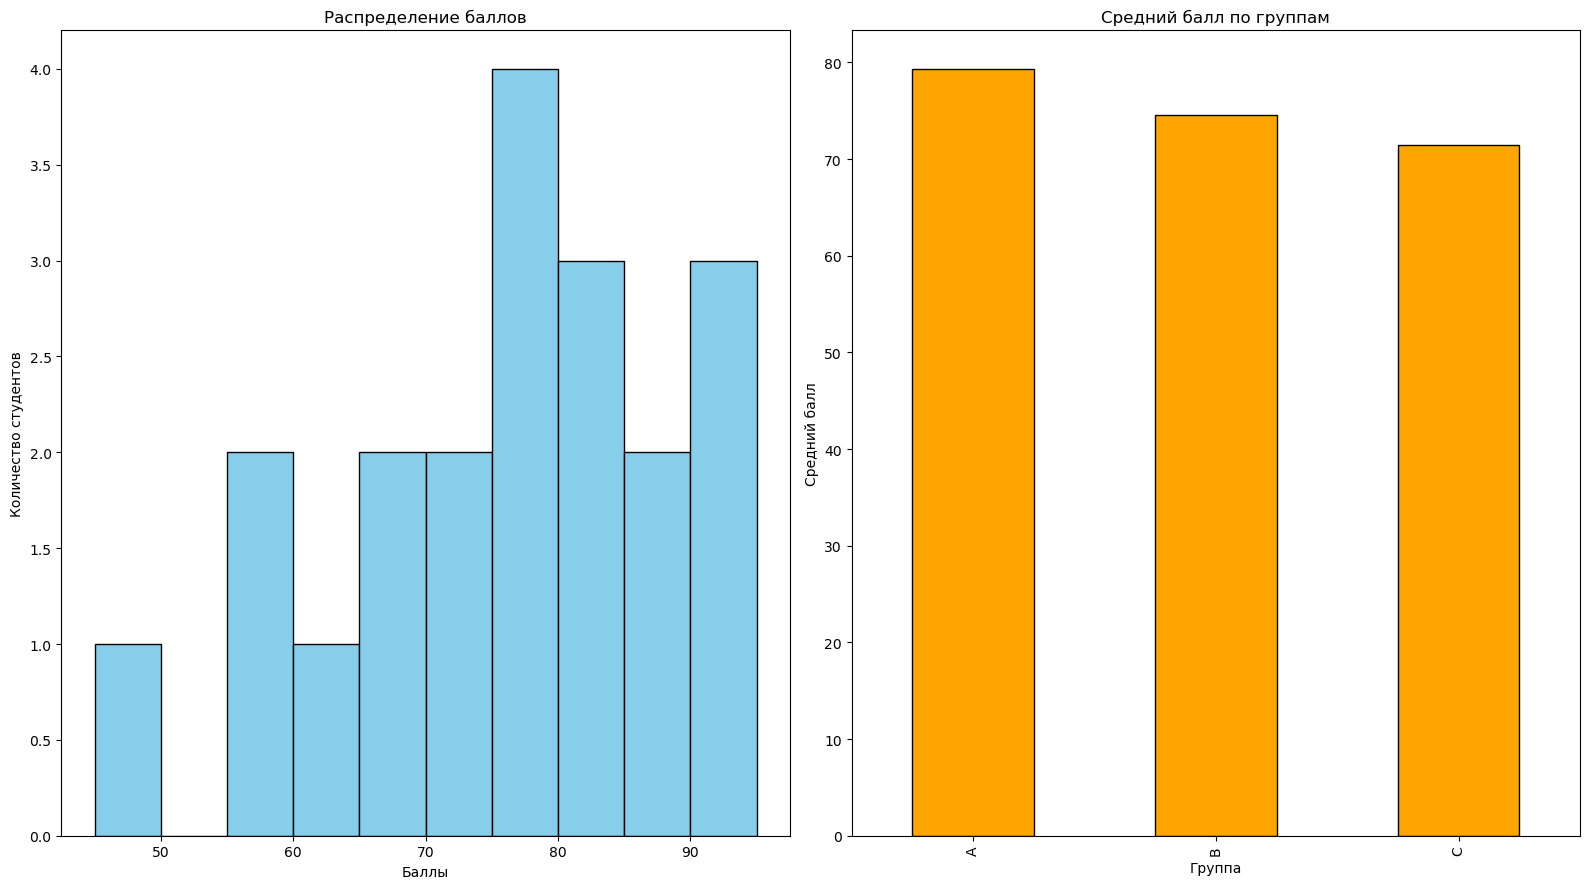

In [ ]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.hist(df["Score"], bins=10, color="skyblue", edgecolor="black")
plt.title("Распределение баллов")
plt.xlabel("Баллы")
plt.ylabel("Количество студентов")

plt.subplot(1, 2, 2)
grouped["Average_Score"].plot(kind="bar", color="orange", edgecolor="black")
plt.title("Средний балл по группам")
plt.xlabel("Группа")
plt.ylabel("Средний балл")

plt.tight_layout()
plt.show()
